0.25580811252040686


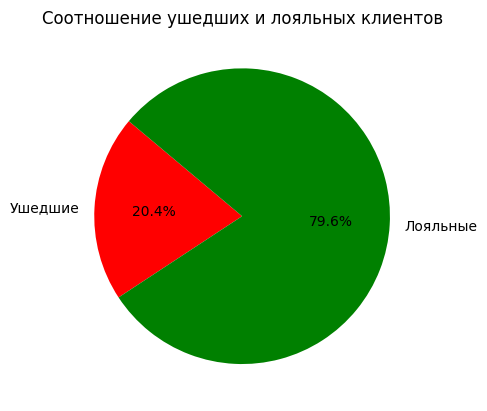

In [10]:

#RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
#CustomerId — идентификатор клиента
#Surname — фамилия клиента
#CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
#Geography — страна клиента (банк международный)
#Gender — пол клиента
#Age — возраст клиента
#Tenure — сколько лет клиент пользуется услугами банка
#Balance — баланс на счетах клиента в банке
#NumOfProducts — количество услуг банка, которые приобрёл клиент
#HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
#IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
#EstimatedSalary — предполагаемая заработная плата клиента
#Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

# #Задание 1.Каково соотношение ушедших и лояльных клиентов
import pandas as pd
import matplotlib.pyplot as plt
clients_base=pd.read_csv('C:/Users/HONOR/OneDrive/Рабочий стол/IDE/Bank/churn.csv', sep=',')
loyal_customers=clients_base[clients_base['Exited']==0]
churned_customers=clients_base[clients_base['Exited']==1]
ratio=len(churned_customers)/len(loyal_customers)
print(ratio)
#Диаграмма
labels=['Ушедшие', 'Лояльные']
sizes=[len(churned_customers), len(loyal_customers)]
colors=['red', 'green']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Соотношение ушедших и лояльных клиентов')
plt.show()


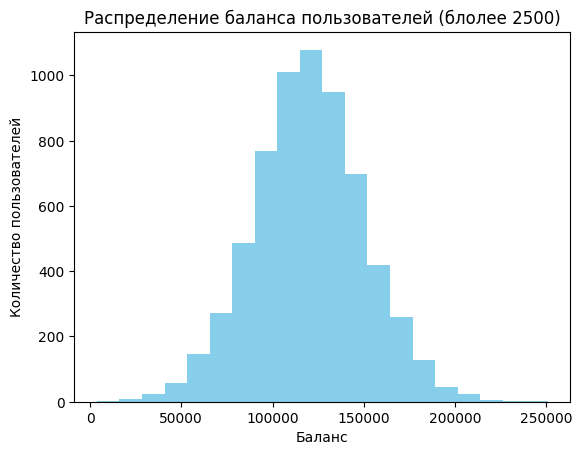

[6383, 3617]


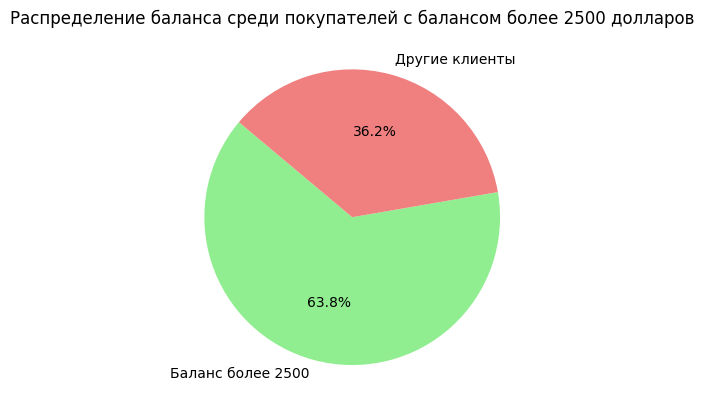

In [15]:
#Задание2
#Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.
import pandas as pd
import matplotlib.pyplot as plt
clients_base=pd.read_csv('C:/Users/HONOR/OneDrive/Рабочий стол/IDE/Bank/churn.csv', sep=',')
filtered_data=clients_base[clients_base['Balance']>2500]
plt.hist(filtered_data['Balance'], bins=20, color='skyblue')
plt.xlabel('Баланс')
plt.ylabel('Количество пользователей')
plt.title('Распределение баланса пользователей (блолее 2500)')
plt.show()

num_clients=len(filtered_data)
sizes=[num_clients, len(clients_base)-num_clients]
labels=['Баланс более 2500'.format(num_clients), 'Другие клиенты']
colors=['lightgreen','lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title ('Распределение баланса среди покупателей с балансом более 2500 долларов')
plt.show()


#Выводы:
#1. Самое большое количество клиентов (более 1000) те, которые имеют около 125000 долларов на балансе.
#2. Основные клиенты имеют на счету 50000--200000 долларов
#3. 64% наших клиентов имеют болоьее 2500 долларов на балансе
    

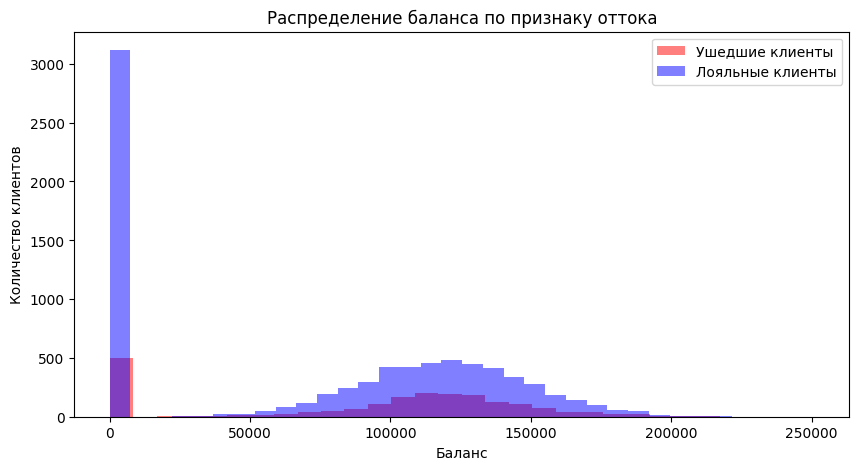

In [21]:
#3 Задание
#Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов?
# одумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.
import pandas as pd
import matplotlib.pyplot as plt
clients_base=pd.read_csv('C:/Users/HONOR/OneDrive/Рабочий стол/IDE/Bank/churn.csv', sep=',')
loyal_customers=clients_base[clients_base['Exited']==0]
churned_customers=clients_base[clients_base['Exited']==1]
plt.figure(figsize=(10,5))
plt.hist(churned_customers['Balance'], bins=30, alpha = 0.5, color='red', label='Ушедшие клиенты' )
plt.hist(loyal_customers['Balance'], bins=30, alpha = 0.5, color='blue', label='Лояльные клиенты' )
plt.xlabel('Баланс')
plt.ylabel('Количество клиентов')
plt.title('Распределение баланса по признаку оттока')
plt.legend()
plt.show()
#Выводы:
# Балас 0 имеют более 3000 лояльных клиентов, и лишь 500 - ушли.
# В остальном сумма баланса ушедших клиентов прямо пропорциональна сумме баланса лояльных клиентов (причем, очевидно, что лояльных клиентов больше примерно в 2 раза)


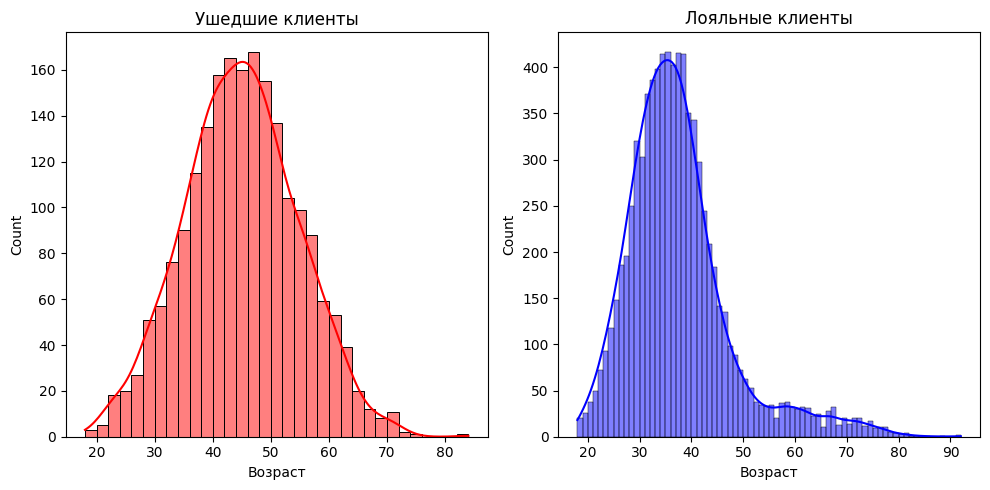

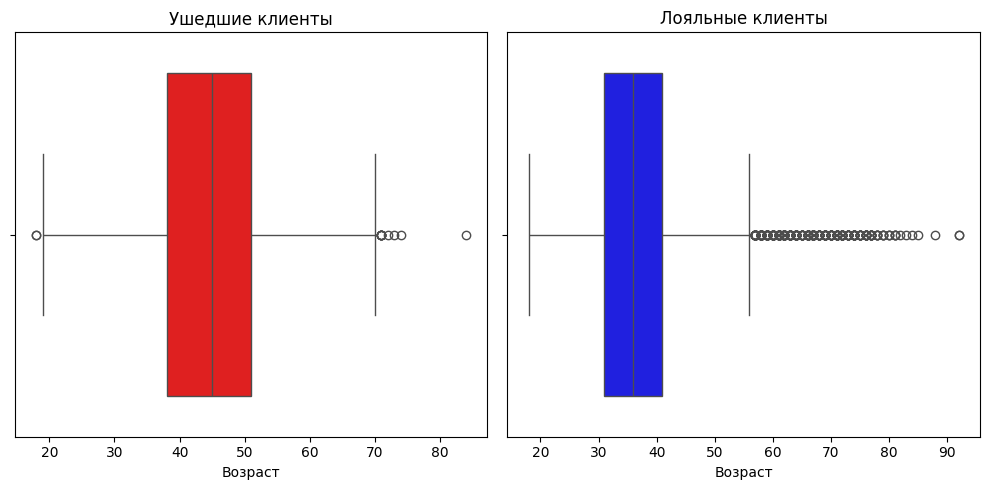

In [31]:
# задание 4
#Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
clients_base=pd.read_csv('C:/Users/HONOR/OneDrive/Рабочий стол/IDE/Bank/churn.csv', sep=',')
clients_base['Age']=pd.to_numeric(clients_base['Age'])
loyal_customers=clients_base[clients_base['Exited']==0]
churned_customers=clients_base[clients_base['Exited']==1]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(churned_customers['Age'], kde=True, color='red')
plt.title('Ушедшие клиенты')
plt.xlabel('Возраст')

plt.subplot(1,2,2)
sns.histplot(loyal_customers['Age'], kde=True, color='Blue')
plt.title('Лояльные клиенты')
plt.xlabel('Возраст')

plt.tight_layout()

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x='Age', data=churned_customers, color='red')
plt.title('Ушедшие клиенты')
plt.xlabel('Возраст')

plt.subplot(1,2,2)
sns.boxplot(x='Age', data=loyal_customers, color='blue')
plt.title('Лояльные клиенты')
plt.xlabel('Возраст')
plt.tight_layout()
plt.show()
#Выводы:
#Ушедшие клиенты пиковый возрась 40-50 лет, а у лояльных клиентов 30-42, а это значит надо обратить внимание, что клиенты после 40 чаще уходят.

    

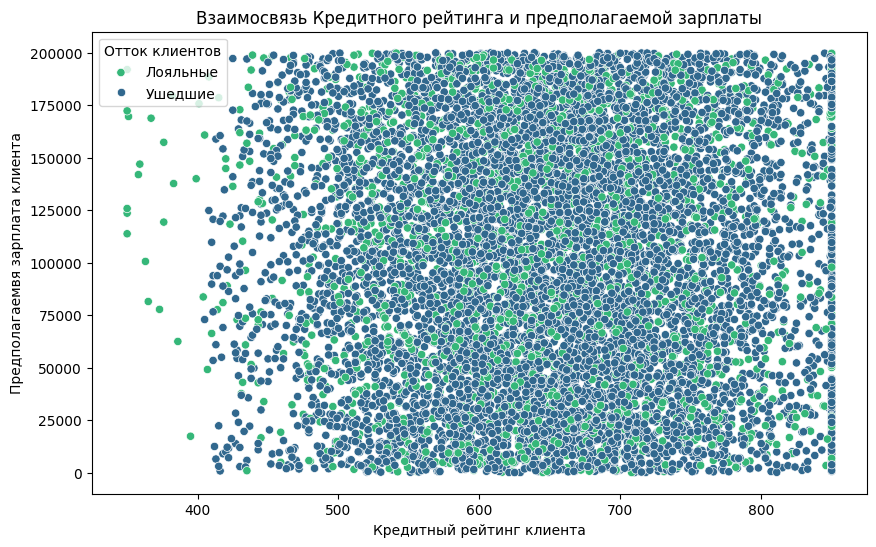

In [34]:
#Задание 5
# Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 
# Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
clients_base=pd.read_csv('C:/Users/HONOR/OneDrive/Рабочий стол/IDE/Bank/churn.csv', sep=',')
plt.figure(figsize=(10,6))
sns.scatterplot(x='CreditScore', y='EstimatedSalary', data=clients_base, hue='Exited', palette='viridis')
plt.xlabel('Кредитный рейтинг клиента')
plt.ylabel('Предполагаемвя зарплата клиента')
plt.title('Взаимосвязь Кредитного рейтинга и предполагаемой зарплаты')
plt.legend(title='Отток клиентов', labels=['Лояльные', 'Ушедшие'])
plt.show()
#Выводы:Явной взаимосвязи нет, распределние довольно хаотичное.

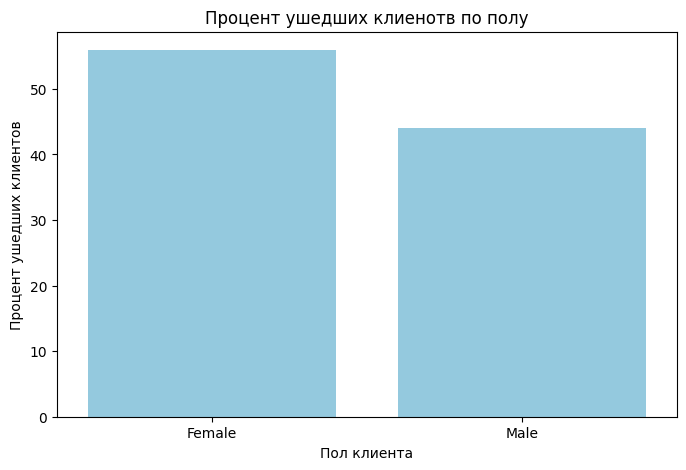

In [40]:
#6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

#Подсказка
#Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited 
# (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
clients_base=pd.read_csv('C:/Users/HONOR/OneDrive/Рабочий стол/IDE/Bank/churn.csv', sep=',')
churned_data=clients_base[clients_base['Exited']==1]
gender_exit_percent=churned_data.groupby('Gender')['Exited'].count()/churned_data['Exited'].count()*100
plt.figure(figsize=(8,5))
sns.barplot(x=gender_exit_percent.index, y=gender_exit_percent, color='skyblue')
plt.xlabel('Пол клиента')
plt.ylabel('Процент ушедших клиентов')
plt.title('Процент ушедших клиенотв по полу')
plt.show()
#Выводы:
#Процент ушедших женщин больше, чкм процент ушедших мужчин (55% против 45%)

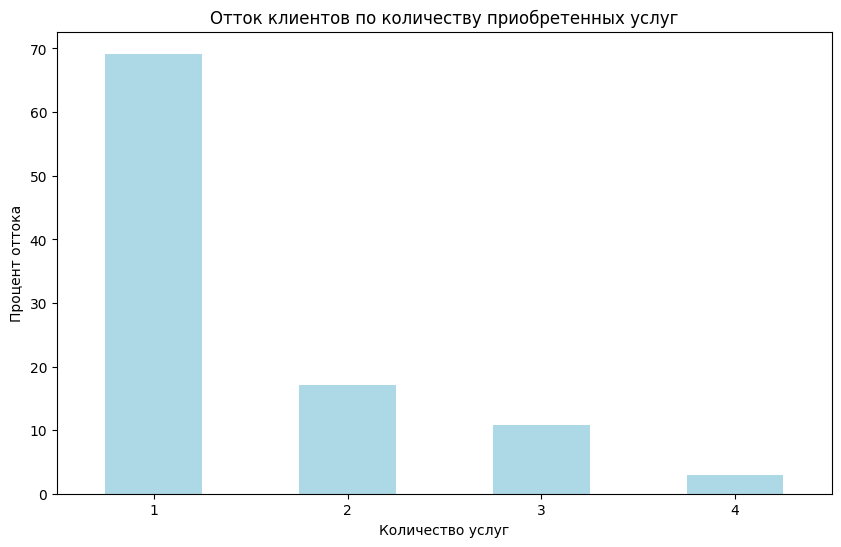

In [42]:
# 7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.
import pandas as pd
import matplotlib.pyplot as plt
clients_base=pd.read_csv('C:/Users/HONOR/OneDrive/Рабочий стол/IDE/Bank/churn.csv', sep=',')
churned_data=clients_base[clients_base['Exited']==1]
service_churn=churned_data.groupby('NumOfProducts')['Exited'].count()/len(churned_data)*100
plt.figure(figsize=(10,6))
service_churn.plot(kind='bar', color='lightblue')
plt.xlabel('Количество услуг')
plt.ylabel('Процент оттока')
plt.title('Отток клиентов по количеству приобретенных услуг')
plt.xticks(rotation=0)
plt.show()
#Выыоды:
#Количство клиентов у которых была только одна услуга чаще всего уходят (почти 70%)

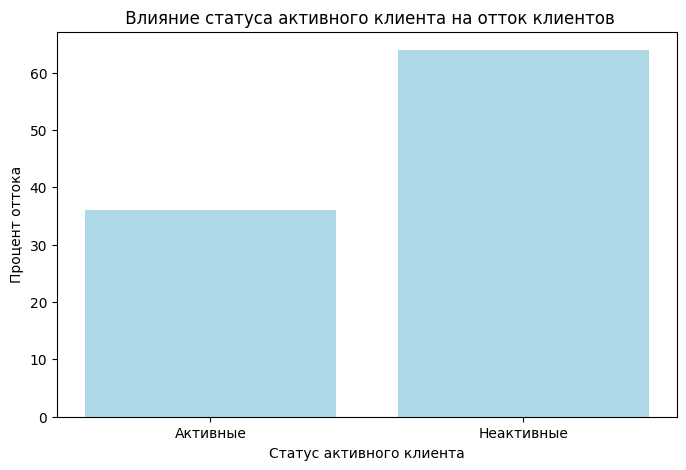

In [46]:
#8. Как влияет наличие статуса активного клиента на отток клиентов?
# Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?
import pandas as pd
import matplotlib.pyplot as plt
clients_base=pd.read_csv('C:/Users/HONOR/OneDrive/Рабочий стол/IDE/Bank/churn.csv', sep=',')
churned_data=clients_base[clients_base['Exited']==1]
active_churn=churned_data[churned_data['IsActiveMember']==1]
inactive_churn=churned_data[churned_data['IsActiveMember']==0]
plt.figure(figsize=(8,5))
plt.bar(['Активные', 'Неактивные'], [len(active_churn)/len(churned_data)*100, len(inactive_churn)/len(churned_data)*100], color='lightblue')
plt.xlabel('Статус активного клиента')
plt.ylabel('Процент оттока')
plt.title(' Влияние статуса активного клиента на отток клиентов')
plt.show()
#Выводы:
#Клиенты со статусом неактивного клиента уходят в 2 раза чаще, чем активне.
#Предложения для банка: 
# 1. Сделать несмколько видов рассылок (с инетрвалом) с интересным предложением к базе неактвных пользователей (или push-уведомления на приложение)
# 2. Проанализировать изменившийся процент активных/неактивных
# 3. Выявить наиболее эффектинвые медоты коммуникации с клиентами и наиболее инетересную информацию для них.

In [79]:
#9.В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.
import plotly.express as px
import pandas as pd
clients_base=pd.read_csv('C:/Users/HONOR/OneDrive/Рабочий стол/IDE/Bank/churn.csv', sep=',')
country_churn=clients_base.groupby('Geography')['Exited'].mean()*100
country_churn_df=pd.DataFrame({
    'Country':country_churn.index,
    'Churn Percentage': country_churn.values
})
fig=px.choropleth(
    country_churn_df,
    locations='Country',
    locationmode='country names',
    color='Churn Percentage',
    color_continuous_scale='Viridis',
    title='Процент оттока клиентов по странам',
    scope='europe',
    center={'lat': 51, 'lon':10},
)
fig.show()
# Выводы
#print(country_churn_df)
#Germany=clients_base.loc[clients_base['Geography']=='Germany']
#France=clients_base.loc[clients_base['Geography']=='France']
#Spain=clients_base.loc[clients_base['Geography']=='Spain']
#print(Germany['EstimatedSalary'].mean())
#print(France['EstimatedSalary'].mean())
#print(Spain['EstimatedSalary'].mean())

# Предположения
# В Германии средний уровень баланса в 2 раза выше чем во Франции и Испании (120000 долларов) и предполагаемая зарплата выше, чем в остальных странах. 
# Можно предположить, что их переманили в другие банки с более интересными предложениями.


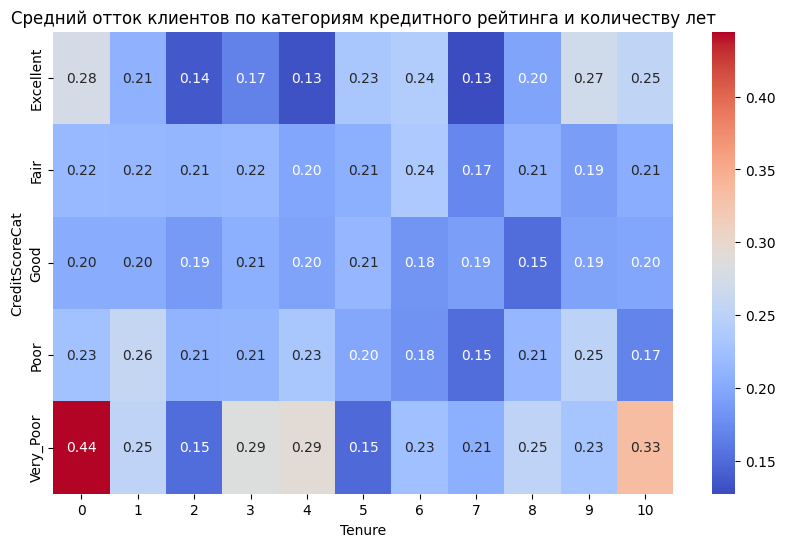

In [80]:
#10.Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(),
# которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
#Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure).
# В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
#На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
clients_base=pd.read_csv('C:/Users/HONOR/OneDrive/Рабочий стол/IDE/Bank/churn.csv', sep=',')
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
clients_base["CreditScoreCat"] = clients_base["CreditScore"].apply(get_credit_score_cat)
pivot_table = pd.pivot_table(clients_base, values="Exited", index="CreditScoreCat", columns="Tenure", aggfunc="mean")
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Средний отток клиентов по категориям кредитного рейтинга и количеству лет")
plt.show()
# Выводы
#Категории Very Poor (credit scores от 300 до 500) чаще всего уходят.  

